The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

In [282]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [283]:
# read & store the data in DF

col = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

df_raw = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', names = col)
df_raw.head(4)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


# Non Graphical Analysis

In [284]:
# Check the size & info

print(df_raw.shape)

df_raw.info()

(214, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


ID is just serial number & can be dropped,
Found no null values in 214 rows of 11 columns

In [285]:
# Drop Id & revisit the info & shape

df_raw.drop('Id', axis=1, inplace = True)
print(df_raw.shape)

df_raw.info()

(214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


No null values found. All independent values are continous numeric while Target label 'Type' is Categorical

<Axes: >

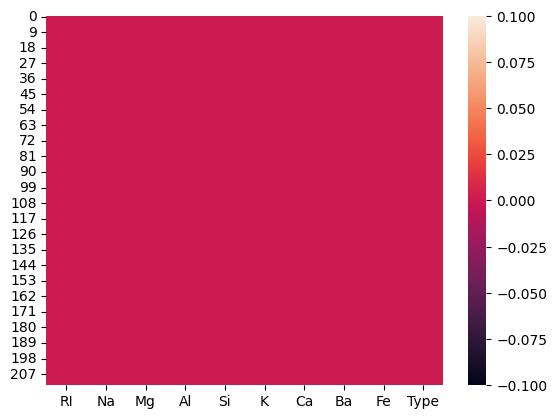

In [286]:
# Visualize non null values using heat-map

sns.heatmap(df_raw.isnull())

No null found

In [287]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():

  print(index,':', df_raw[index].nunique())

RI : 178
Na : 142
Mg : 94
Al : 118
Si : 133
K : 65
Ca : 143
Ba : 34
Fe : 32
Type : 6


All independent values are continous numeric while Target label 'Type' is Categorical and has 6 unique values

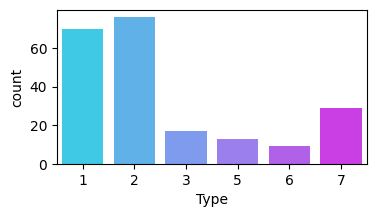

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [288]:
# plot the unique value count of glass types in dataset

mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['Type'], palette = 'cool')
mp.show()

print(df_raw['Type'].value_counts())

As per the requirement, grouping the type Window glass : 1-4 as 1 and 5-7 (non window glass) as 0

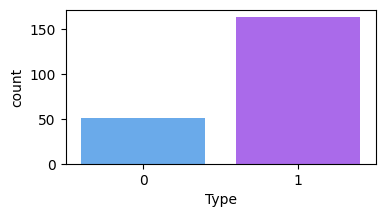

1    163
0     51
Name: Type, dtype: int64


In [289]:
# Grouping the type column in 0 & 1

df_raw['Type'] = np.where(df_raw['Type']>4, 0, 1)

mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['Type'], palette = 'cool')
mp.show()

print(df_raw['Type'].value_counts())

**Clearly the data is not balanced, performing SMOTE to balance the data**

In [290]:
# Import & apply SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=2)
X = df_raw.iloc[:,:-1]
y = df_raw['Type']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


df_gl_bal = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_gl_bal['Type'] = y_resampled

print(df_gl_bal.shape)

df_gl_bal.sample(4)

(214, 9)
(214,)
(326, 9)
(326,)
(326, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
40,1.517930,12.790000,3.500000,1.120000,73.030000,0.640000,8.770000,0.000000,0.000000,1
276,1.516120,14.221576,0.000000,2.774418,73.416848,0.040000,9.044795,0.428768,0.079212,0
130,1.521770,13.750000,1.010000,1.360000,72.190000,0.330000,11.140000,0.000000,0.000000,1
290,1.519284,13.376138,2.191356,1.451592,72.732670,0.234261,9.894939,0.000000,0.000000,0


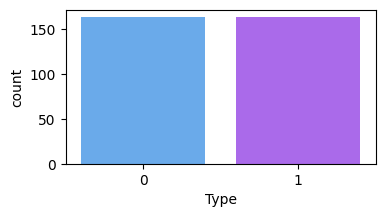

1    163
0    163
Name: Type, dtype: int64


In [291]:
# Countplot of balanced data after SMOTE

mp.figure(figsize=(4,2))
sns.countplot(x=df_gl_bal['Type'], palette = 'cool')
mp.show()

print(df_gl_bal['Type'].value_counts())

Data is balanced now, perforing analysis on this data

# GRAPHICAL ANALYSIS

UNIVARIATE

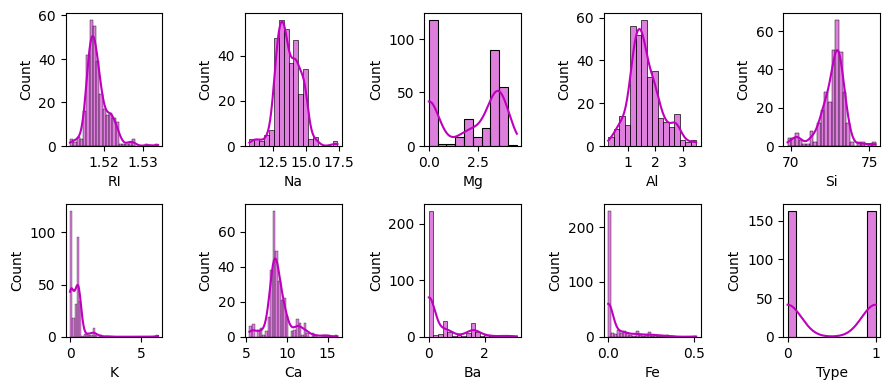

In [292]:
# Histplot to check distribution

mp.figure(figsize=(9,4))
pnum = 1

for index in df_gl_bal.columns.to_list():
  if(pnum<=10):
    ax = mp.subplot(2,5, pnum)
    sns.histplot(df_gl_bal[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Data is skewed

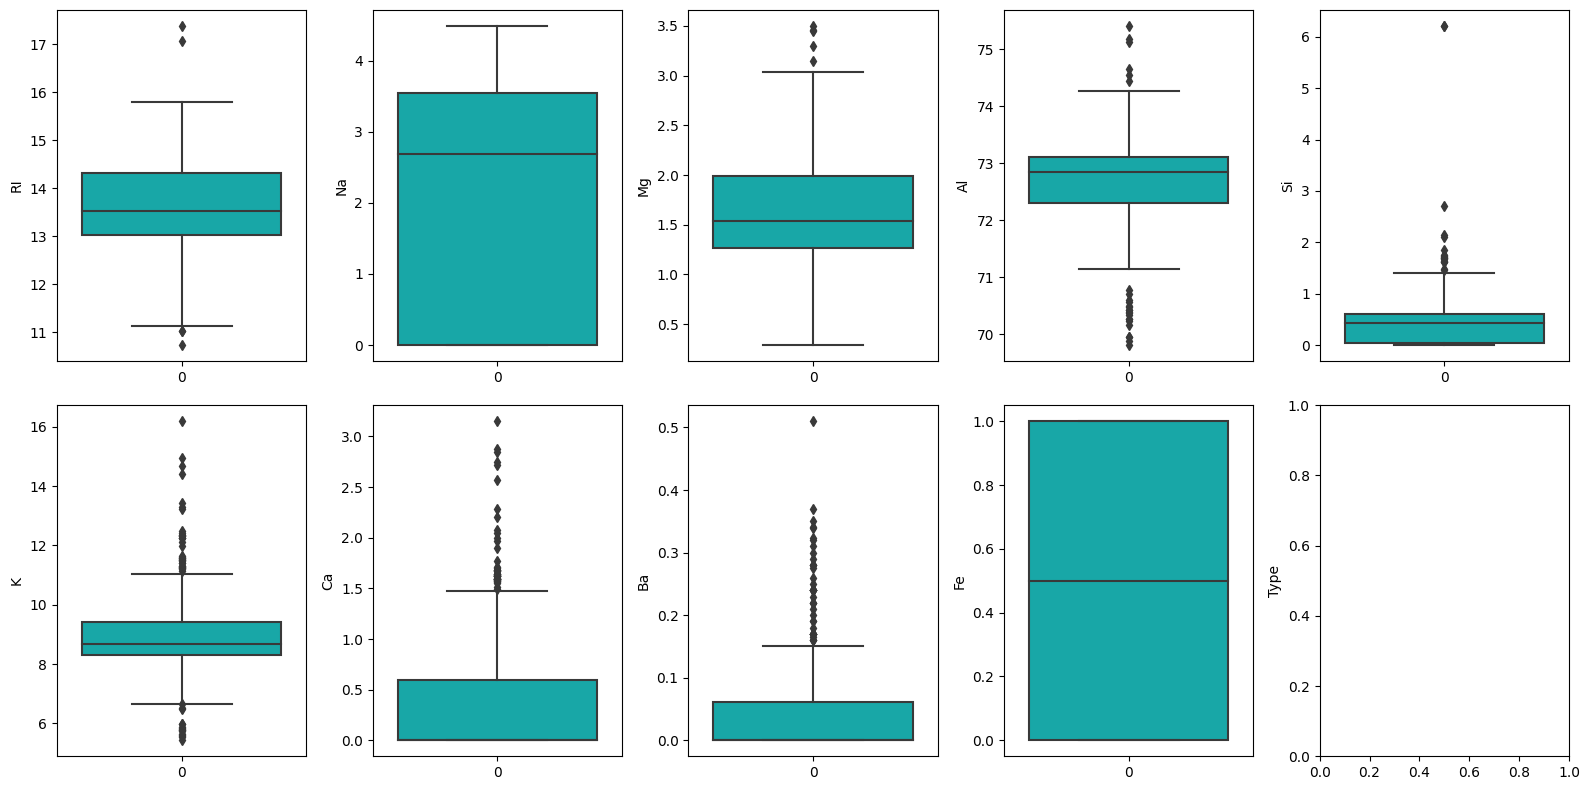

In [293]:
# Box plot to visualize outliers

mp.figure(figsize=(16,8))
pnum = 1

for index in df_gl_bal.columns.to_list():
  if(pnum<=10):
    sns.boxplot(df_gl_bal[index], color = 'c')
    ax = mp.subplot(2,5,pnum)
    mp.ylabel(index)
  pnum = pnum+1
  mp.tight_layout()

mp.show()

Probable Outliers in almost all fields

# BIVARIATE ANALYSIS

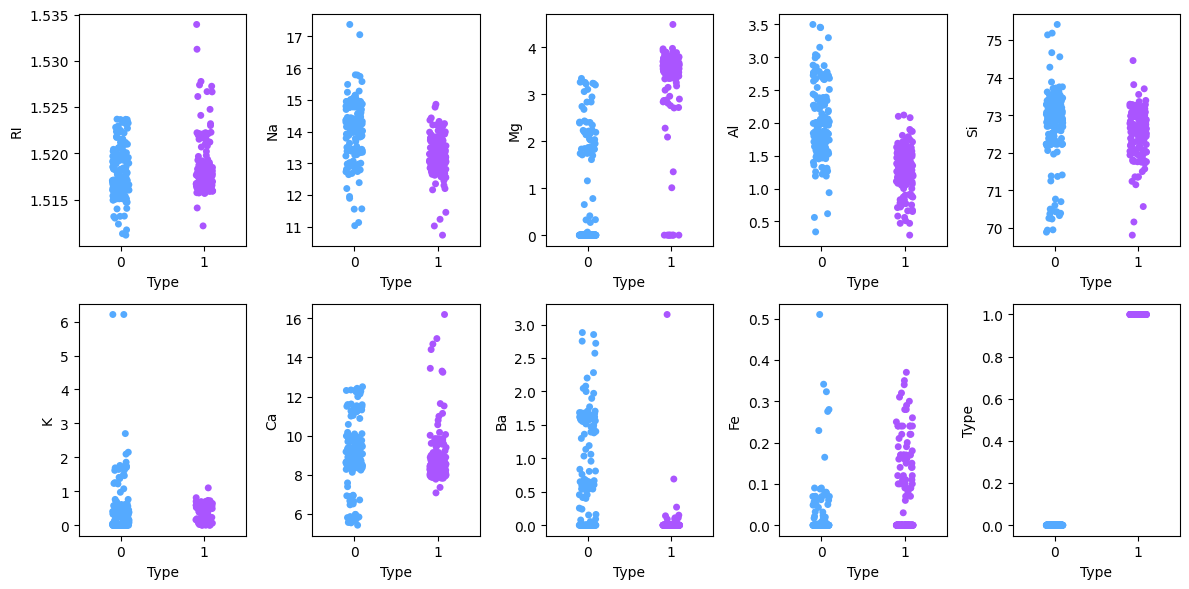

In [294]:
# Striplot to understand relation between independent labels with target labels

mp.figure(figsize=(12,6))
pnum = 1

for index in df_gl_bal.columns.to_list():
  if(pnum<=10):
    ax = mp.subplot(2,5, pnum)
    sns.stripplot(x=df_gl_bal['Type'], y =df_gl_bal[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Type 0 is found in limited range in all fields

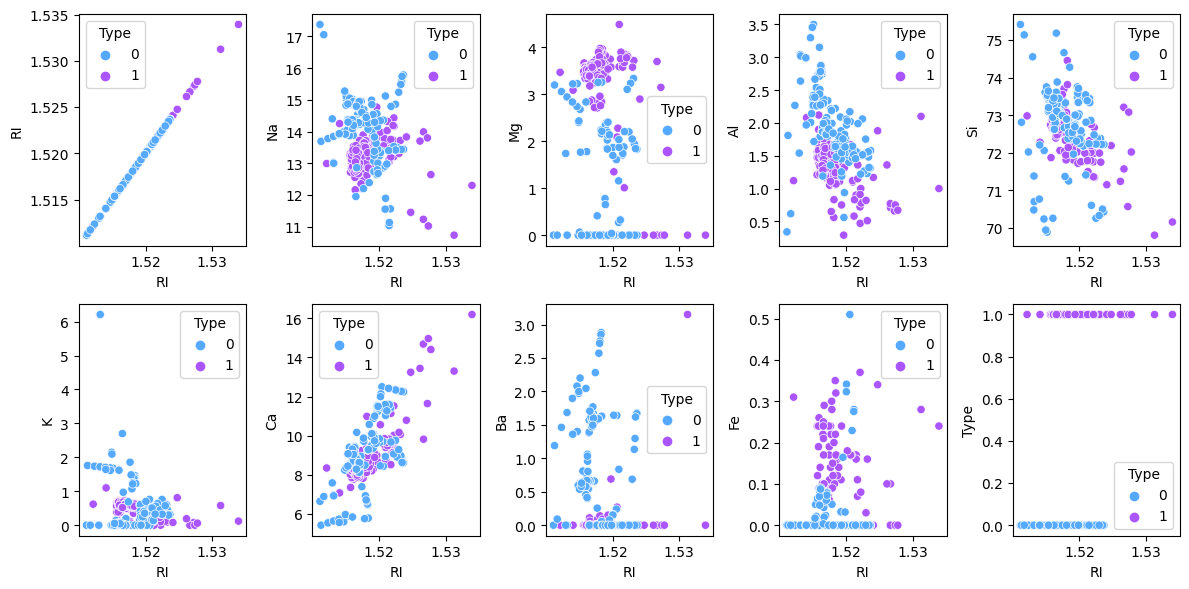

In [295]:
# Scatter Plot to check distribution of independent labels wrt to RI for various Types

mp.figure(figsize=(12,6))
pnum = 1

for index in df_gl_bal.columns.to_list():
  if(pnum<=10):
    ax = mp.subplot(2,5, pnum)
    sns.scatterplot(x=df_gl_bal['RI'], y =df_gl_bal[index], palette = 'cool', hue =df_gl_bal['Type'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

<Axes: >

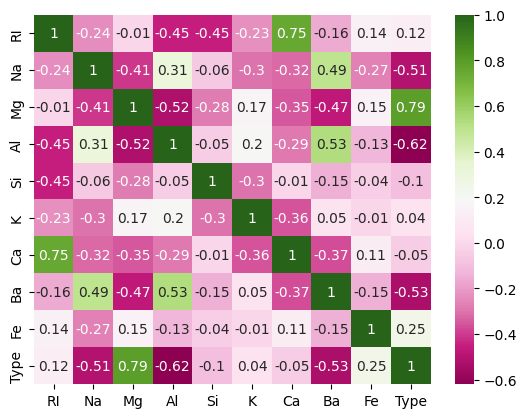

In [296]:
# Checking Heat map of correlation

sns.heatmap(round(df_gl_bal.corr(),2), cmap = 'PiYG', annot = True)

RI shows strong +ve correlation with Ca

Checking Outliers

(299, 10)


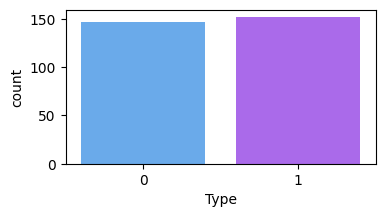

1    152
0    147
Name: Type, dtype: int64


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.522130,14.210000,3.82,0.470000,71.770000,0.11,9.570000,0.000000,0.0,1
249,1.515397,14.874929,0.00,2.382606,73.615297,0.00,8.469774,0.587422,0.0,0
140,1.516900,13.330000,3.54,1.610000,72.540000,0.68,8.110000,0.000000,0.0,1


In [297]:
# Removing Outliers where |Z-score| > 3

df_features = df_gl_bal.iloc[:,:-1]
df_target = df_gl_bal['Type']
df_gl_bfil = df_gl_bal[(np.abs(sp.zscore(df_features)) <= 3).all(axis=1)]

print(df_gl_bfil.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_gl_bfil['Type'], palette = 'cool')
mp.show()
print(df_gl_bfil['Type'].value_counts())

df_gl_bfil.sample(3)

Removed Outliers using Z-score, data got slightly imbalanced but within acceptable limits

In [298]:
# Checking Skewness

df_gl_bfil.skew()

RI      0.749620
Na      0.066921
Mg     -0.374195
Al      0.571234
Si     -1.125843
K       1.418600
Ca      0.624123
Ba      1.522360
Fe      1.925485
Type   -0.033618
dtype: float64

In [299]:
# Applying cuberoot transformation where skewness is high and not within acceptable limits <=1

for index in df_gl_bfil.columns.to_list():

  if (np.abs(df_gl_bfil[index].skew()) >1):
    df_gl_bfil[index] = np.cbrt(df_gl_bfil[index])

df_gl_bfil.skew()

RI      0.749620
Na      0.066921
Mg     -0.374195
Al      0.571234
Si     -1.155483
K      -0.561129
Ca      0.624123
Ba      0.884990
Fe      1.083282
Type   -0.033618
dtype: float64

Cuberoot Transformation has reduced the skewness of Ca and Fe within permissible limits, but skewness is still high for Mg & Ba

Standardize the data, by applying Min Max Scalar

In [300]:
# Apply Min Max scalar to scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Split the independednt label for Scaling

gl_data = df_gl_bfil.iloc[:,:-1]
df_gl_bf_sca = pd.DataFrame(scaler.fit_transform(gl_data),columns = gl_data.columns.to_list())
df_gl_bf_sca['Type'] = df_gl_bfil['Type']
print('Skewness')
print(df_gl_bf_sca.skew())

df_gl_bf_sca.sample(3)

Skewness
RI      0.749620
Na      0.066921
Mg     -0.374195
Al      0.571234
Si     -1.155483
K      -0.561129
Ca      0.624123
Ba      0.884990
Fe      1.083282
Type   -0.229850
dtype: float64


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
98,0.341146,0.361345,0.634744,0.382328,0.689933,0.674636,0.419476,0.363998,0.90178,1.0
53,0.459635,0.443277,0.632517,0.329135,0.595473,0.666651,0.454432,0.000000,0.00000,1.0
42,0.421875,0.457983,0.755011,0.345758,0.575184,0.682436,0.394507,0.000000,0.00000,1.0


Scaling also didnt have too much effect on skewness of Mg & Ba

In [301]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_feat = df_gl_bfil.iloc[:,:-1]
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]

vif

,Feature,VIF Val
0,RI,483761.371643
1,Na,2550.869666
2,Mg,82.470442
3,Al,38.530238
4,Si,373409.294473
5,K,15.911192
6,Ca,1147.065126
7,Ba,14.638461
8,Fe,1.487601


In [302]:
# Remove Collinearity by dropping High VIF label , ie, RI

df_feat.drop('RI', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]

vif

,Feature,VIF Val
0,Na,695.673166
1,Mg,21.300048
2,Al,32.280384
3,Si,1228.020623
4,K,8.516765
5,Ca,221.357601
6,Ba,7.410755
7,Fe,1.463060


In [303]:
# Remove Collinearity by dropping High VIF label , ie, Si

df_feat.drop('Si', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]

vif

,Feature,VIF Val
0,Na,267.542746
1,Mg,15.667748
2,Al,25.649264
3,K,7.763089
4,Ca,136.232473
5,Ba,7.392493
6,Fe,1.439909


In [304]:
# Remove Collinearity by dropping High VIF label , ie, Na

df_feat.drop('Na', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]

vif

,Feature,VIF Val
0,Mg,4.853779
1,Al,18.247213
2,K,6.600971
3,Ca,13.022438
4,Ba,3.684240
5,Fe,1.416979


Dropped RI, Si & Na due to very high VIF, further dropping VIFs is not recommended as we will need features

Separate independent, target labels for training dataset

In [305]:
# Separate independent & target labels

x_df = df_feat
y_df = df_gl_bfil['Type']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(x_df.shape)
print(y_df.shape)

print(x_df.sample(3))
print(y_df.sample(3))

(299, 6)
(299,)
           Mg        Al         K        Ca        Ba        Fe
263  0.000000  2.439886  0.284522  8.792246  0.838402  0.364784
204  0.000000  2.270000  0.000000  8.710000  0.875034  0.000000
303  2.837635  3.152117  1.174510  5.848257  1.269318  0.000000
152    1
276    0
21     1
Name: Type, dtype: int64


# Modelling

Hypertuning Random Forest Classifier Model

In [306]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'min_samples_split': 8, 'random_state': 68}


In [307]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 12 with accuracy score: 1.0


Random Forest Classifiers gave accuracy score of 1 at randome state = 12 for best hypertuned parameters



Hypertuning Extra Trees Classifier Model

In [308]:
from sklearn.tree import ExtraTreeClassifier


etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 2, 'random_state': 5}


In [309]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 16 with accuracy score: 1.0


Extra Tree Classifiers gave accuracy score of 1 at randome state = 12/16 for best hypertuned parameters





Decision Tree Classifiers

In [310]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 9, 'random_state': 12}


In [311]:
# Training the DTC  Model with given best hypertuning parameters
DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 16 with accuracy score: 1.0



Decision Tree Classifier gave accuracy of 1 for hypertuned parameters






K Neighbors Classifier Model

In [312]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 7}


In [313]:
# Training KNN Model

max_acc = 0
max_rand_st = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 13 with accuracy score: 1.0


KNN gives max accuracy of 1  for best hypertuned parameter

SVC Model

In [314]:
from sklearn.svm import SVC

svc = SVC()
param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

samples = 8
randomCV = RandomizedSearchCV(svc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_svc = randomCV.best_params_

{'kernel': 'poly', 'gamma': 0.1, 'C': 1}


In [315]:
# Training SVC Model

max_acc = 0
max_rand_st = 0
SV = SVC(C = bp_svc['C'], kernel = bp_svc['kernel'], gamma = bp_svc['gamma'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  SV.fit(x_train, y_train)
  pred = SV.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 12 with accuracy score: 1.0


SVC gives max accuracy of 1 for best hypertuned parameters

ADABOOST CLASSIFIER

In [316]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_


{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 90, 'random_state': 79}


In [317]:
# Training ABC Model

max_acc = 0
max_rand_st = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 12 with accuracy score: 1.0


ABC gives max accuracy of 1 for best parameters


In [320]:
# Checking CV Score

from sklearn.model_selection import cross_val_score

cv = 5
model_list = [RFC, ETC, KNN, SV, ABC]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),2))
  print('\n')

RandomForestClassifier(max_depth=4, max_features=2, min_samples_split=8,
                       random_state=68) : Avg CV Score is  0.96


ExtraTreeClassifier(criterion='entropy', max_features=9, random_state=5) : Avg CV Score is  0.96


KNeighborsClassifier(n_neighbors=7) : Avg CV Score is  0.97


SVC(C=1, gamma=0.1, kernel='poly') : Avg CV Score is  0.96


AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=90,
                   random_state=79) : Avg CV Score is  0.94




**Based on accuracy score & CV Score : SVC seems to best model**


Accuracy Score is perfect for RFC, KNN, ETC, SVC but mean CV Score is highest for KNN so applying KNN Model

In [321]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

KNN_SEL = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 13, test_size = 0.2)
KNN_SEL.fit(x_train, y_train)
pred = KNN_SEL.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 1.0


Confusion Matrix: 
 [[34  0]
 [ 0 26]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60





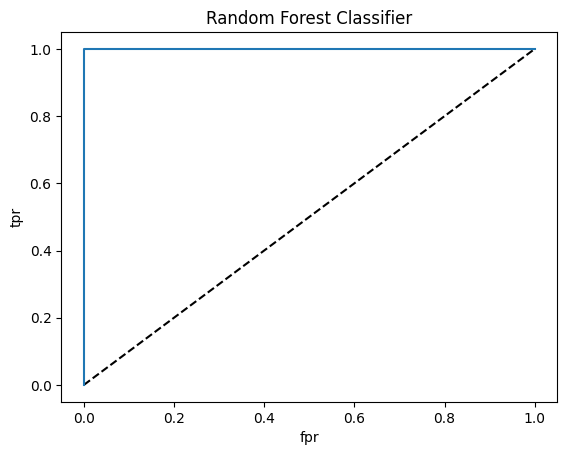

In [322]:
# Checking ROC_AUC Curve

# Checking AUC & ROC

y_pred_prob = KNN_SEL.predict_proba(x_test)[:, 0]

# 3,4,5,6 quality is considered as one class, while 6-7 are another (One Over Rest menthod)

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

AUC-ROC Curve indicates the model is well fitted

# SAVING THE MODEL

In [323]:
import joblib

joblib.dump(KNN_SEL, 'KNN_GL_QLT_PRED.pkl')

['KNN_GL_QLT_PRED.pkl']

# CHECKING THE SAVED MODEL

In [324]:
# Load the saved model

load_GL_TYPE_PRED = joblib.load('KNN_GL_QLT_PRED.pkl')

GLF = load_GL_TYPE_PRED

In [325]:
# Function to predict Glass Type

def pred_glass_qlt(input):
  inp = np.array(input)
  type_gl  =  GLF.predict(inp.reshape(1, -1))

  if (type_gl == 0):
    k = "Non Window Glass"

  elif (type_gl == 1):
    k = "Window Glass"

  else:
    k = 'Cant Say'

  print('predicted quality:', type_gl)
  return k

In [326]:
# Checking Prediction

rws = [59, 24, 142, 167, 65]
for row in rws:
  print('Actual:', y_df[row] , 'Predicted by Model:', pred_glass_qlt(df_feat.iloc[row,:]))
  print('\n')

predicted quality: [1]
Actual: 1 Predicted by Model: Window Glass


predicted quality: [1]
Actual: 1 Predicted by Model: Window Glass


predicted quality: [1]
Actual: 1 Predicted by Model: Window Glass


predicted quality: [0]
Actual: 0 Predicted by Model: Non Window Glass


predicted quality: [1]
Actual: 1 Predicted by Model: Window Glass




**Verified from the data in image below, model is workig fine**

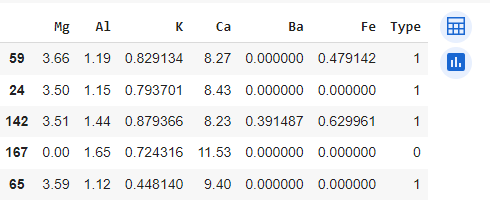

**MODEL SEEMS TO BE PREDICTING ACCURATELY**